In [219]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
                      }

We're going to get torch, torch.nn (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and matplotlib.

In [220]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0'

# 1. Data (preparing and loading)

data almost anything...
- spreadsheet
- Images
- Video
- Audio
- DNA
- Text

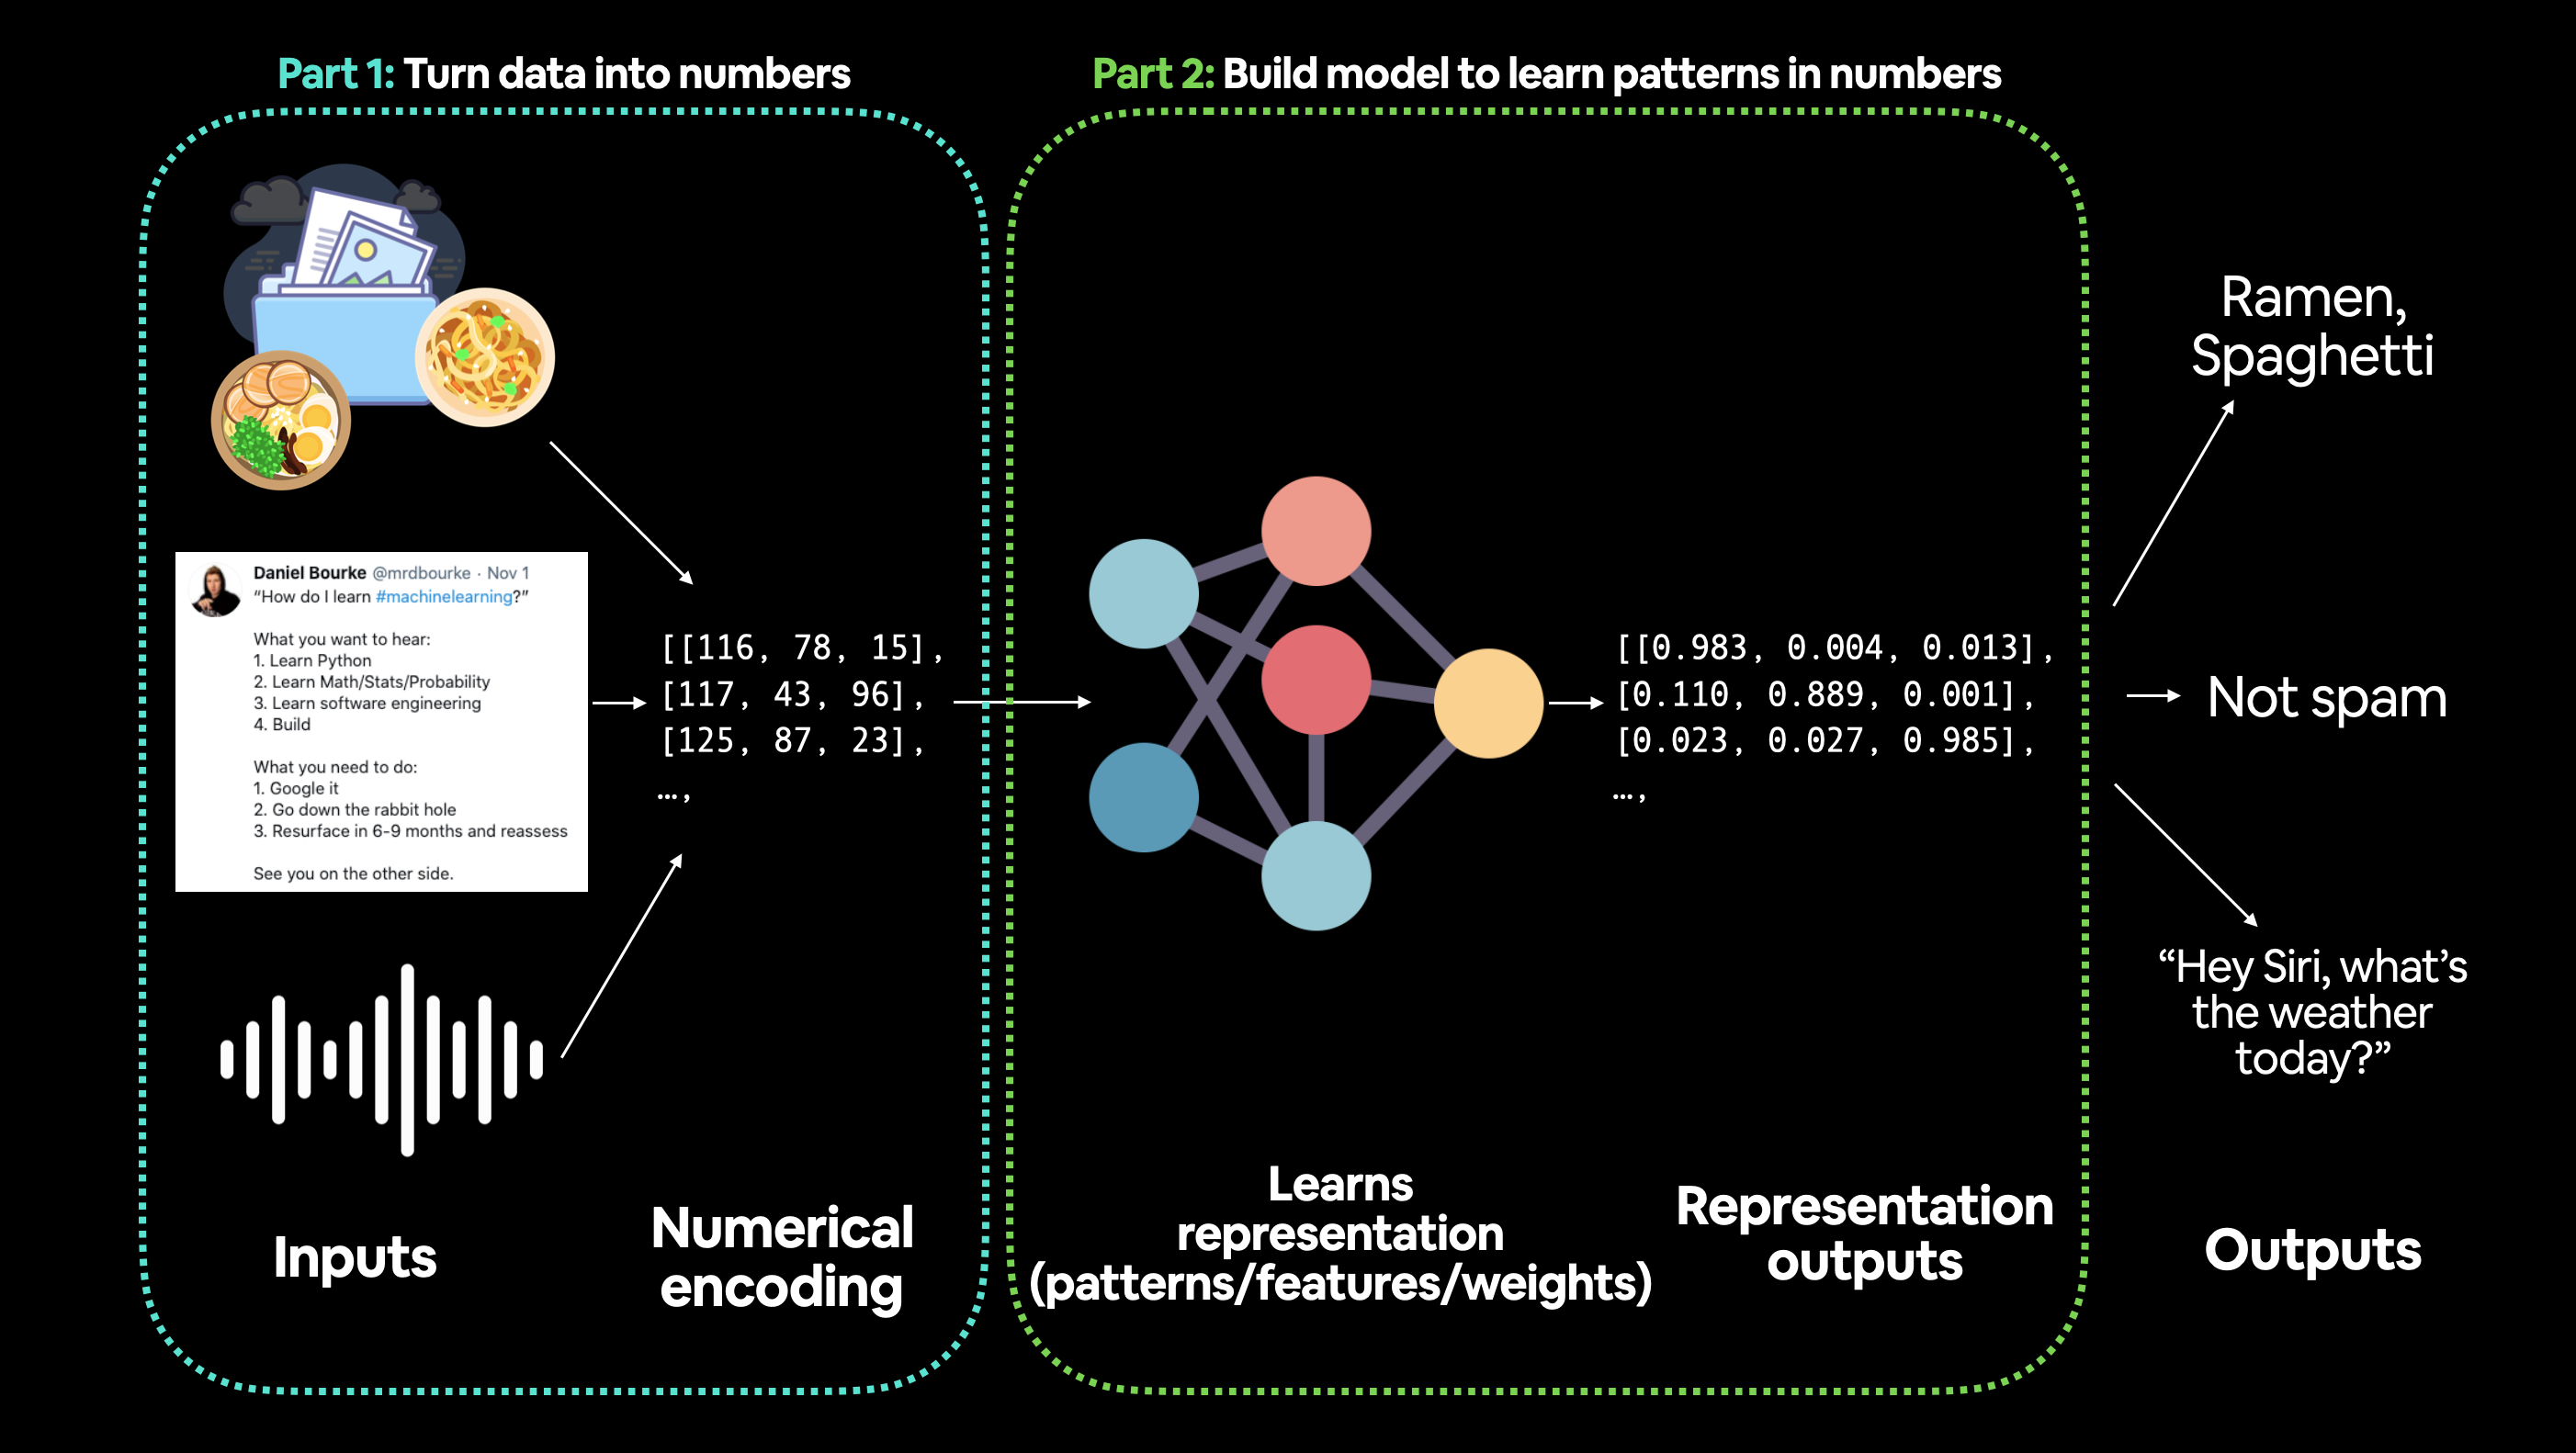

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

### linear regression

In [221]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### split training dan test data sets
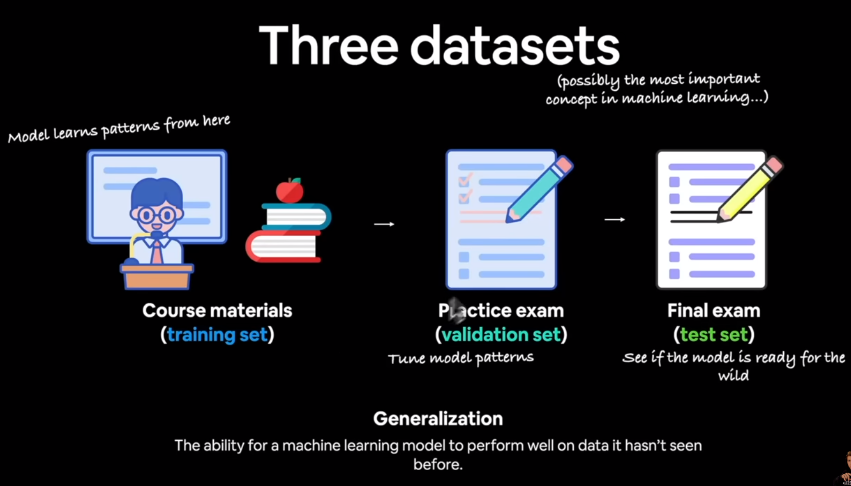

- Training => The model learns from this data (like the course materials you study during the semester).
- Validation => The model gets tuned on this data (like the practice exam you take before the final exam).
- Tests =>	The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).

In [222]:
# for now, just create training and testing dataset
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

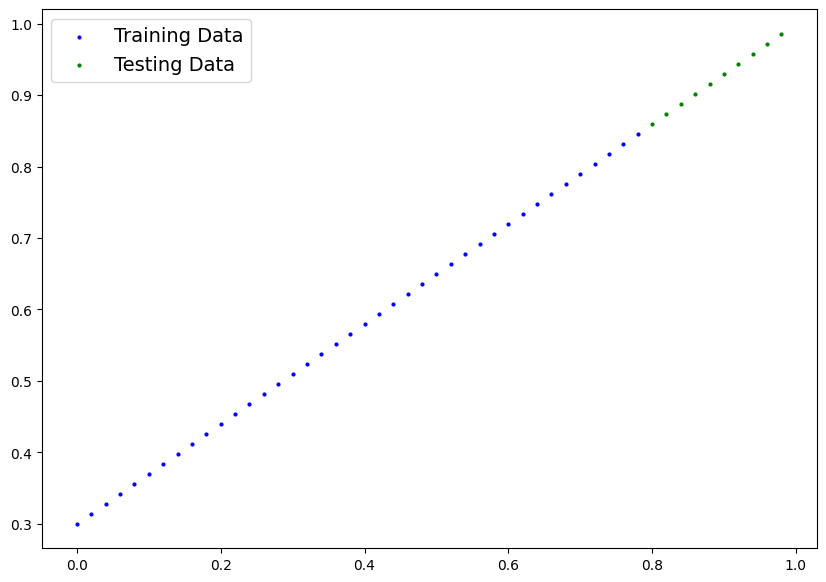

In [223]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compare prediction
  """
  # set size of visualization
  plt.figure(figsize=(10, 7))
  
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  # plot testing data in greem
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # is there prediction?
  if predictions is not None:
    # plot predicition if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Prediction Data")

  # show the legend
  plt.legend(prop={"size":14})

plot_prediction()

### Building Model

what our model does?
* Start with random values (weight and bias)
* Look at training data and adjust the random value to better represent (get closer to) deal values (weight and bias)

How does it do so?
Through two main algorithm:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

![Alt text](image.png)

In [224]:
# Create a Linear Regression model class
# <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,  # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float),  # <- PyTorch loves float32 by default
                                    requires_grad=True)  # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1,  # <- start with random bias (this will get adjusted as the model learns)
                                             dtype=torch.float),  # <- PyTorch loves float32 by default
                                 requires_grad=True)  # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    # <- "x" is the input data (e.g. training/testing features)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # <- this is the linear regression formula (y = m*x + b)
        return self.weights * x + self.bias

### PyTorch model builiding essentials

- torch.nn = Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
- torch.nn.Parameter = Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
- torch.nn.Module = The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
- torch.optim = Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
- def forward() = All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

Checking the contents of a PyTorch model

Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using .parameters().

In [225]:
# create a random seed
torch.manual_seed(42)

# create an instace of model
model_0 = LinearRegressionModel()

# check parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [226]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [227]:
# making predictions

# with torch.no_grad():
#   y_preds = model_0(X_test)

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

torch.no_grad() adalah cara lama untuk menonaktifkan gradien. Ketika torch.no_grad() digunakan, semua operasi yang dilakukan di dalam blok with akan dihitung tanpa melacak gradien. Hal ini dapat meningkatkan kinerja dalam beberapa kasus, tetapi juga dapat menyebabkan kesalahan jika Anda mencoba mengakses gradien dari tensor yang dibuat dalam blok with.

torch.inference_mode() adalah cara baru untuk menonaktifkan gradien. Ketika torch.inference_mode() digunakan, gradien akan dinonaktifkan secara otomatis untuk semua operasi yang dilakukan di dalam blok with. Hal ini lebih aman daripada menggunakan torch.no_grad(), karena tidak mungkin untuk mengakses gradien dari tensor yang dibuat dalam blok with.


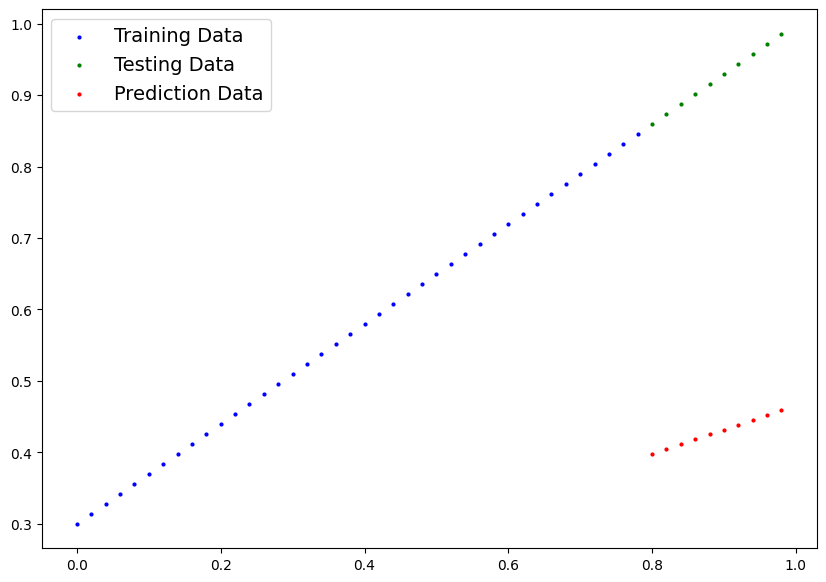

In [228]:
plot_prediction(predictions=y_preds)

#### Train model
update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a loss function as well as an optimizer.

The rolls of these are:

- Loss Function = Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.
- Optimizer = Tells your model how to update its internal parameters to best lower the loss.

In [229]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [230]:
# setup loss function
loss_fn = nn.L1Loss()

# setup loss optimizer
optimizer = torch.optim.SGD(  params=model_0.parameters(),
                              lr=0.01 )

### Building training and testing loop in PyTorch
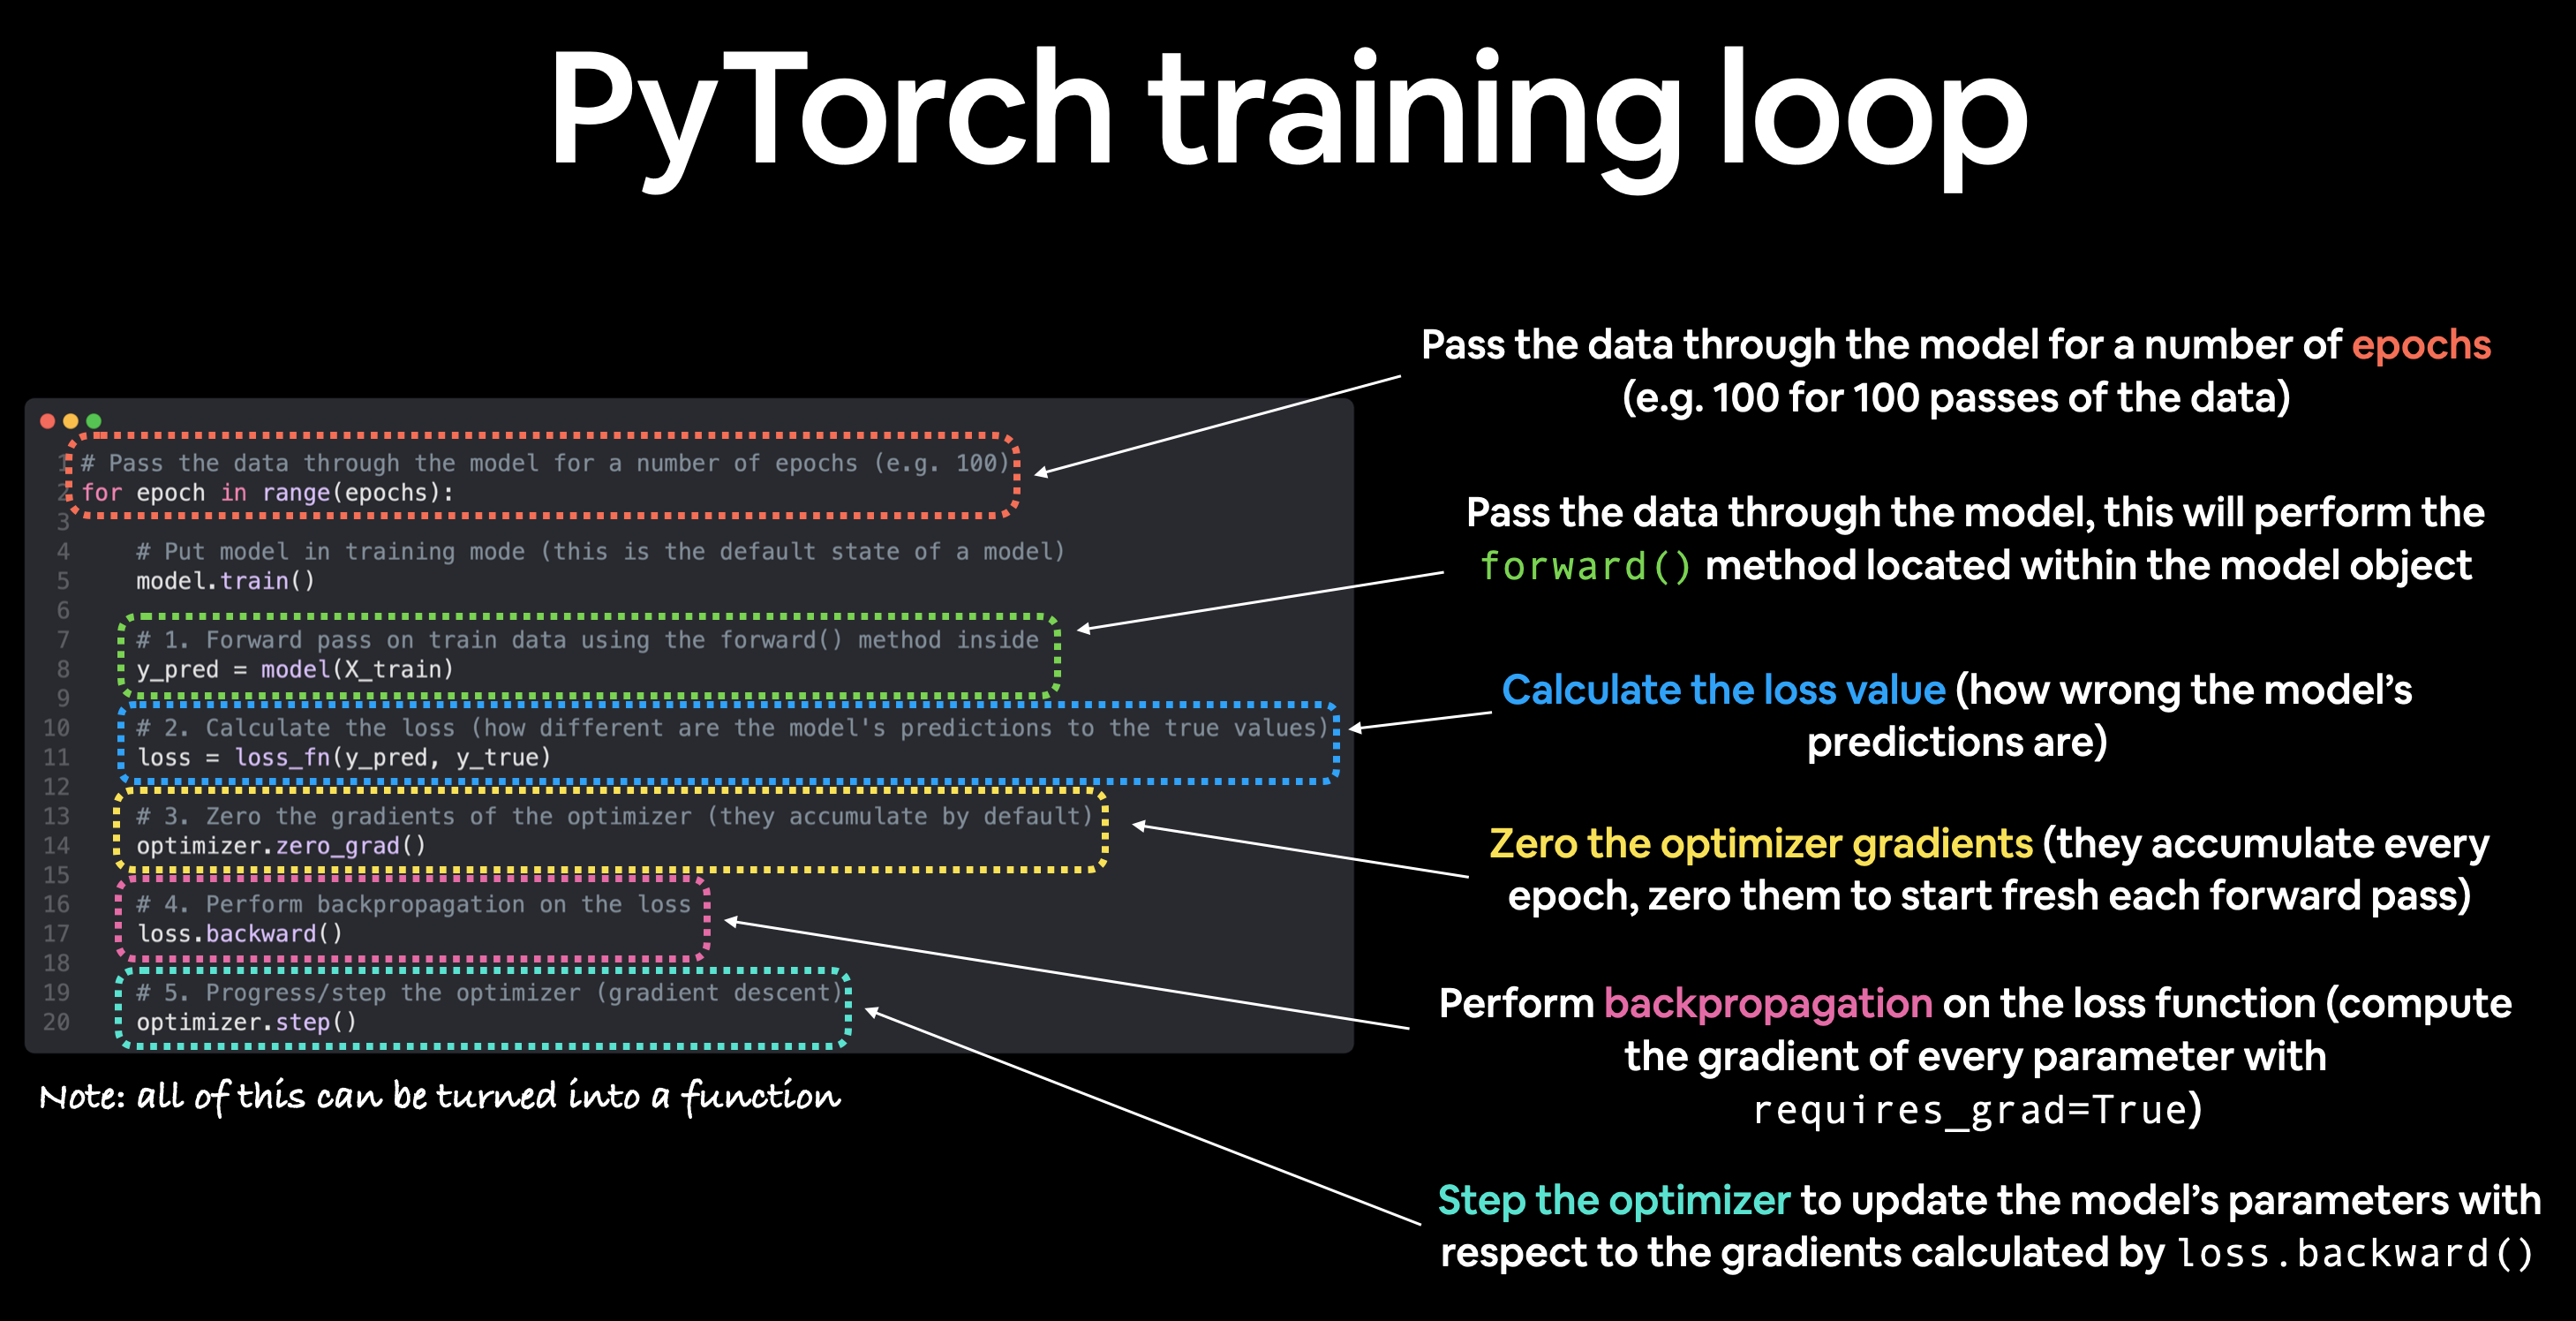
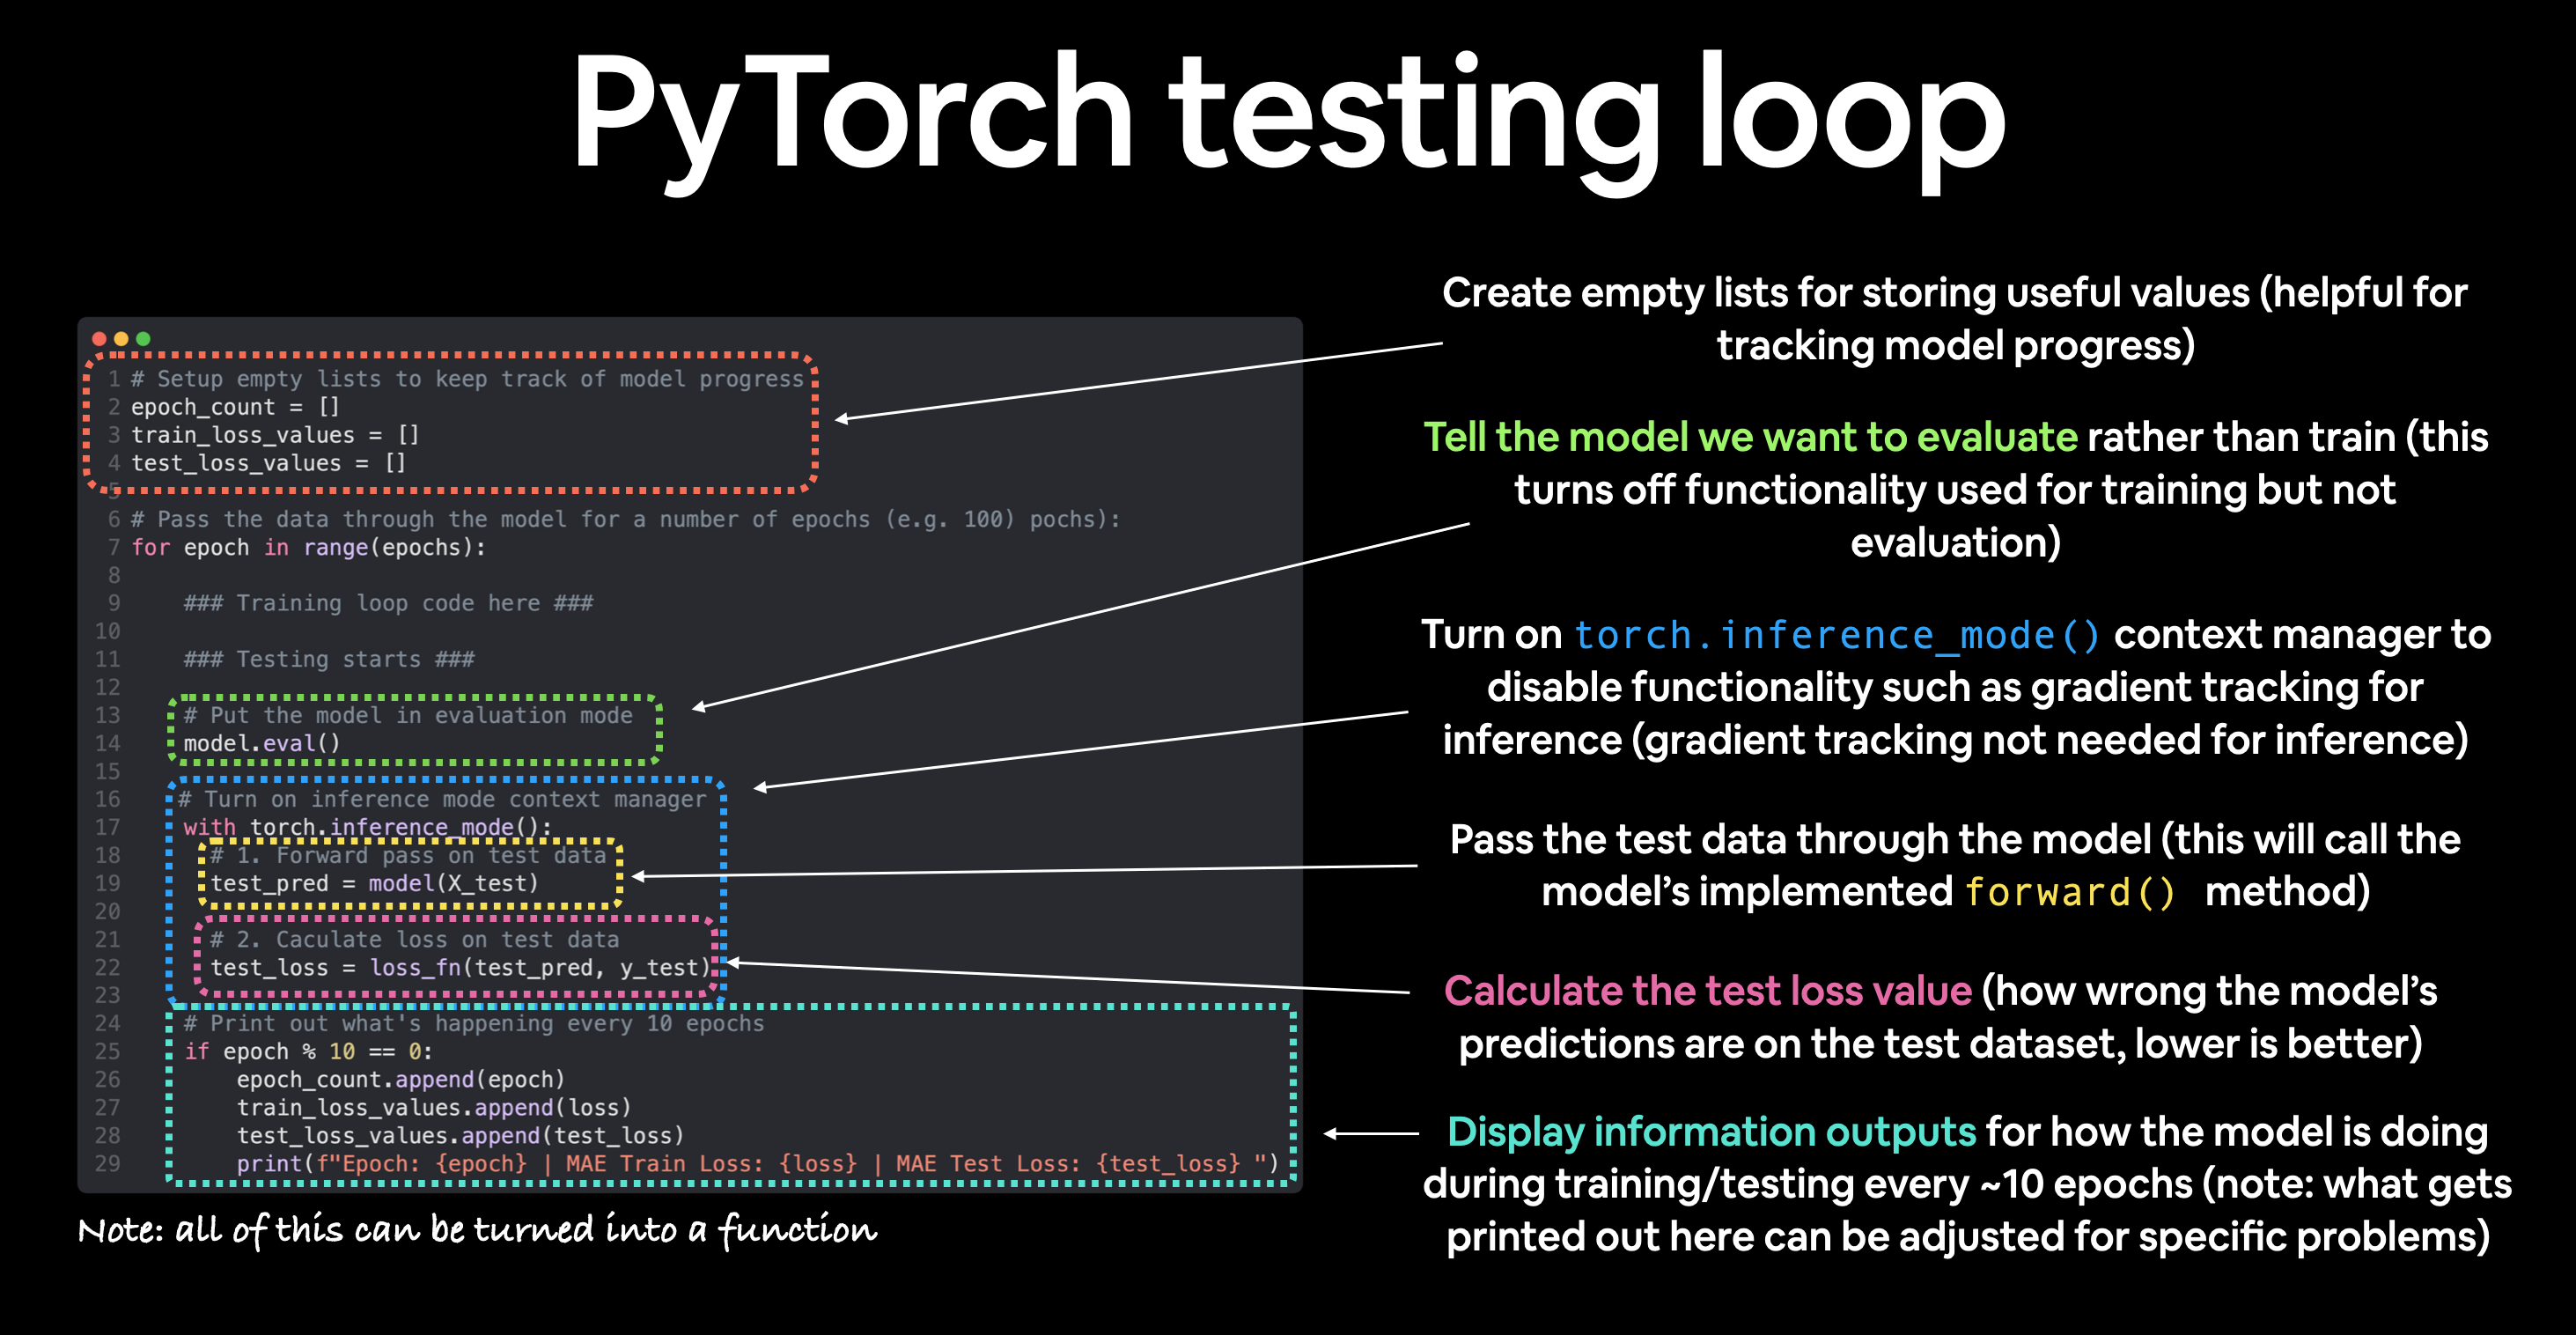


In [231]:
torch.manual_seed(42)

# an loop throught data
epoch = 200

# tracking diffrent values for each epoch
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. loop throught the data
for epoch in range(epoch):
  # set model to training mode
  model_0.train()

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimize zero grad
  optimizer.zero_grad()

  # 4. perform back-propagation on the loss 
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  ### TESTING
  model_0.eval() # turn off different setting in the model 
  with torch.inference_mode(): # turns off gradient tracking and coupler more things
    # 1. do the forward pass
    test_pred = model_0(X_test)

    # 2. calculate loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what happenin in behind
  if epoch % 10 == 0:
    
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    # state dict of parameter
    print(model_0.state_dict())

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | MAE Train Loss: 0.03818932920694351 

In [232]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [233]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

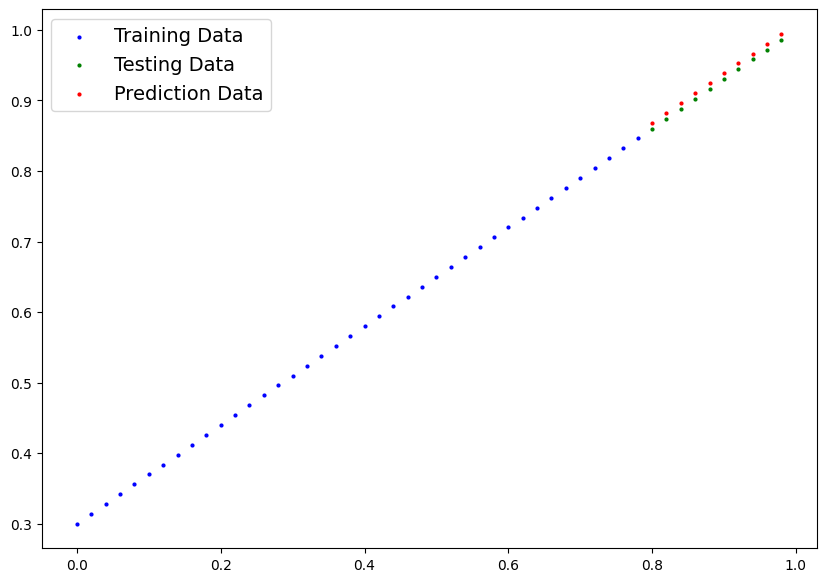

In [234]:
plot_prediction(predictions=y_preds_new)

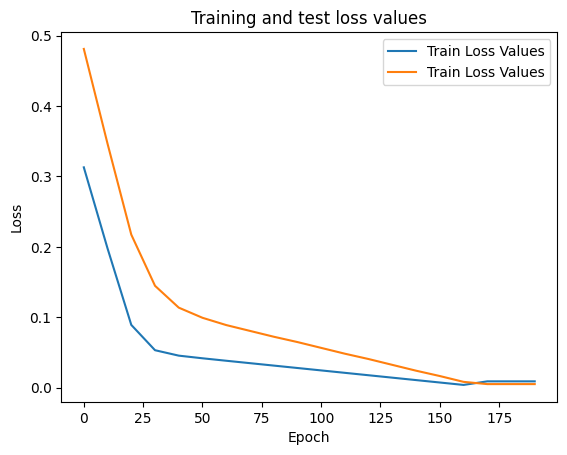

In [235]:
## PLOT LOSSCURVE 
plt.plot(epoch_count, train_loss_values, label="Train Loss Values")
plt.plot(epoch_count, test_loss_values, label="Train Loss Values")
plt.title("Training and test loss values")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

### Save the model
- `torch.save`	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
- `torch.load`	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
- `torch.nn.Module.load_state_dict`	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [238]:
from pathlib import Path

### SAVING MODEL ###

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save model state dict
print("saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
            f=MODEL_SAVE_PATH)

saving model to: {MODEL_SAVE_PATH}


In [239]:
### LOADIN MODEL ###

# to load a saved state_dict. we have to instatiate a new instace of our model class
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [240]:
# load the saved model
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [241]:
# MAKE SOME PREDICTION 
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])